
## Welcome

This is material for the **Directed Acyclical Graphs** chapter in Scott Cunningham's book, [Causal Inference: The Mixtape.](https://mixtape.scunning.com/)



### Packages needed

The first thing you need to do is install a few packages to make sure everything runs:

In [14]:
#load_ext rpy2.ipython

In [17]:
#%%R
# install.packages("tidyverse")
# install.packages("cli")
# install.packages("haven")
# install.packages("estimatr")
# install.packages("stargazer")

### Load

In [1]:
#%%R

library(haven)
library(tidyverse)
library(estimatr)
library(stargazer)
library(cli)

# read_data function
read_data <- function(df) {
  full_path <- paste0("https://raw.github.com/scunning1975/mixtape/master/", df)
  return(haven::read_dta(full_path))
}

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'estimatr' was built under R version 3.6.3"
Please cite as: 

 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 

Warning message:
"package 'cli' was built under R version 3.6.3"

## Collider - Discrimination

In [2]:
#%%R

tb <- tibble(
  female = ifelse(runif(10000)>=0.5,1,0),
  ability = rnorm(10000),
  discrimination = female,
  occupation = 1 + 2*ability + 0*female - 2*discrimination + rnorm(10000),
  wage = 1 - 1*discrimination + 1*occupation + 2*ability + rnorm(10000) 
)

In [3]:
tb

female,ability,discrimination,occupation,wage
0,1.73048197,0,5.8837342,10.5538151
0,0.36883844,0,0.6000639,3.4719793
0,-0.08501946,0,-0.5355559,-0.3338885
1,2.39117709,1,4.2129410,9.6553612
0,1.72347833,0,6.7763000,11.2905961
1,0.57961258,1,-1.5958720,-0.7628434
1,-0.96850229,1,-3.2930698,-4.7002412
0,-1.78600559,0,-4.2010266,-6.6337978
1,-0.70927419,1,-0.9784104,-2.6835755
1,-0.24002622,1,1.4538798,-0.7116285


In [4]:
lm_1 <- lm(wage ~ female, tb)
lm_2 <- lm(wage ~ female + occupation, tb)
lm_3 <- lm(wage ~ female + occupation + ability, tb)

stargazer(lm_1,lm_2,lm_3, 
          type = "text", 
          column.labels = c("Biased Unconditional", "Biased", "Unbiased Conditional")
          )


                                                     Dependent variable:                                 
                    -------------------------------------------------------------------------------------
                                                            wage                                         
                       Biased Unconditional                Biased                Unbiased Conditional    
                                (1)                         (2)                          (3)             
---------------------------------------------------------------------------------------------------------
female                       -3.005***                    0.630***                    -0.971***          
                              (0.085)                     (0.029)                      (0.028)           
                                                                                                         
occupation                                   

#### QUESTIONS
- What is the true direct effect of discrimination on wages?  
- Explain the channels by which discrimination impacts wages.  
- What makes occupation a collider?
- What controls are necessary to eliminate this collider bias?



## Movie Star

In [5]:
#%%R

set.seed(3444)

star_is_born <- tibble(
  beauty = rnorm(2500),
  talent = rnorm(2500),
  score = beauty + talent,
  c85 = quantile(score, .85),
  star = ifelse(score>=c85,1,0)
)

In [16]:
cli::cli_h1("Full Sample")
star_is_born %>% 
   lm(beauty ~ talent, .) %>% 
    ggplot(aes(x = talent, y = beauty)) +
  geom_point(size = 0.5, shape=23) + xlim(-4, 4) + ylim(-4, 4)


-- Full Sample -----------------------------------------------------------------



Call:
lm(formula = beauty ~ talent, data = .)

Coefficients:
(Intercept)       talent  
  -0.003073    -0.018809  



-- Conditional on Being a Star -------------------------------------------------


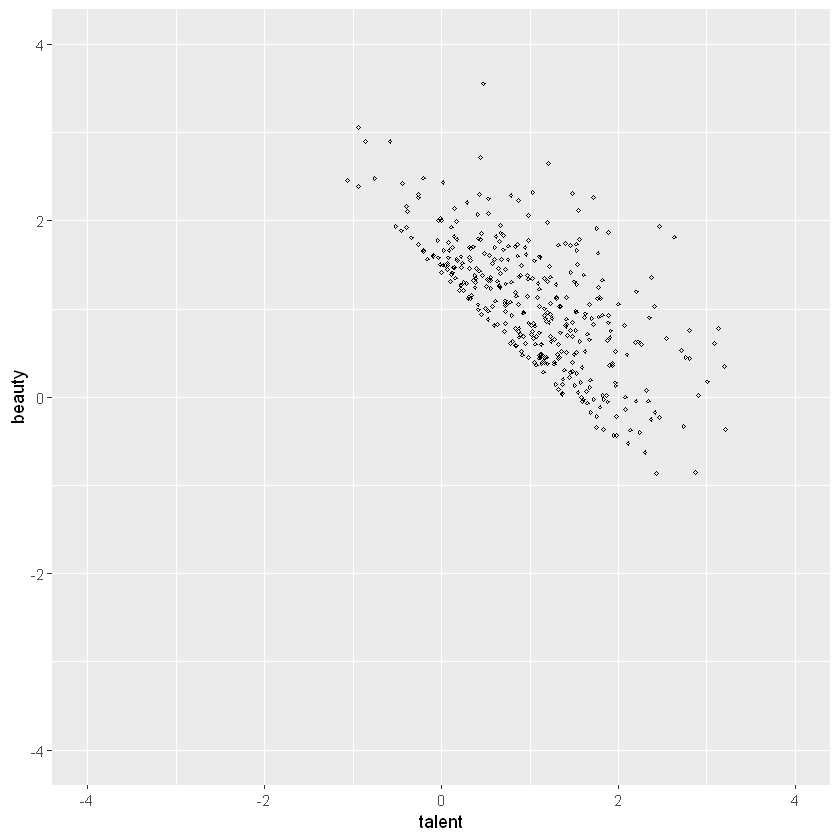

In [17]:
#%%R

cli::cli_h1("Conditional on Being a Star")
star_is_born %>% 
  filter(star == 1) %>% 
  lm(beauty ~ talent, .) %>% 
  ggplot(aes(x = talent, y = beauty)) +
  geom_point(size = 0.5, shape=23) + xlim(-4, 4) + ylim(-4, 4)



-- Conditional on Not Being a Star ---------------------------------------------


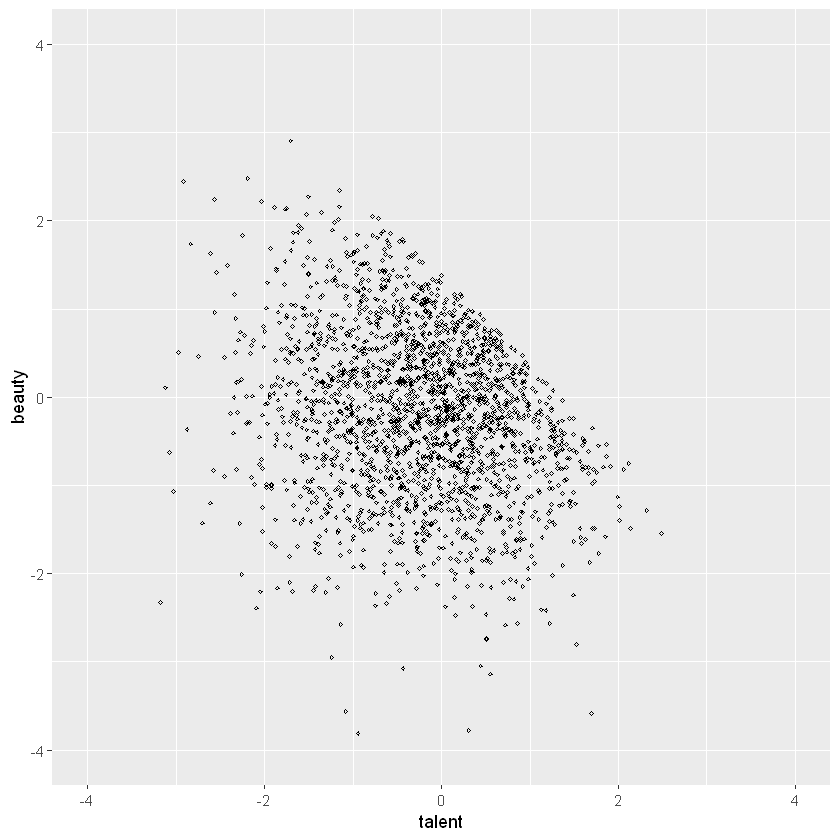

In [13]:
#%%R

cli::cli_h1("Conditional on Not Being a Star")
star_is_born %>% 
  filter(star == 0) %>%
  lm(beauty ~ talent, .) %>% 
  ggplot(aes(x = talent, y = beauty)) +
  geom_point(size = 0.5, shape=23) + xlim(-4, 4) + ylim(-4, 4)

#### QUESTIONS
- What is the correlation between talent and beauty among stars?  Non-stars?
- But what is the correlation between talent and beauty in the population?